In [1]:
"""
Численное решение ОДУ методом прогонки
"""


import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#начальные данные

#отрезок
a = 0
b = 1

#значения функции на концах отрезка
ua = 0
ub = 1.8

#коэффициенты
p = 0.5
q = 3

#константы - для аналитического решения
c1 = (1.8 + 61/36 - 0.5 - 1/6 - 61*np.exp(2)/36) / (np.exp(-1.5) - np.exp(2))
c2 = 61/36 - c1

#количество разбиений
count = lambda t: math.ceil((b - a) / t)

#функция правой части уравнения
f = lambda t: 1.5 * t**2 + t - 6

#аналитическое решение
u = lambda t: c1 * np.exp(-1.5*t) + c2 * np.exp(2*t) + (t**2)/2 + t/6 - 61/36


In [3]:
#метод прогонки
def running(h):
    t = np.arange(a, b + h, h)
    N = count(h) + 1
    solution = np.zeros(N)
    A = -1 - 0.25*h
    B = 2 + 3*(h**2)
    C = 0.25*h - 1
    solution[0] = ua
    solution[N-1] = ub
    
    #массивы коэффициентов прогонки
    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)
    
    #прямой ход прогонки
    gamma[0] = B
    alpha[0] = - C / gamma[0]
    beta[0] = f(t[0]) * h**2 / gamma[0]
    for i in range(1, N):
        gamma[i] = B + A * alpha[i - 1]
        alpha[i] = - C / gamma[i]
        beta[i] = (f(t[i]) * h**2 - A * beta[i - 1]) / gamma[i]
    
    #обратный ход прогонки
    for i in reversed(range(1, N - 1)):
        solution[i] = alpha[i] * solution[i + 1] + beta[i]
        
    return solution

#вычисление погрешности по правилу Рунге
def runge(h):
    N = count(h) + 1
    R = np.zeros(N)
    for i in range(N):
        R[i] = abs(running(h/2)[2*i] - running(h)[i]) / 3
    return R    
    
#достижение заданной точности
def accuracy(h, eps):
    R = max(runge(h))
    while R > eps:
        h1 = h/2
        R = max(runge(h))
        h = h1
    return h

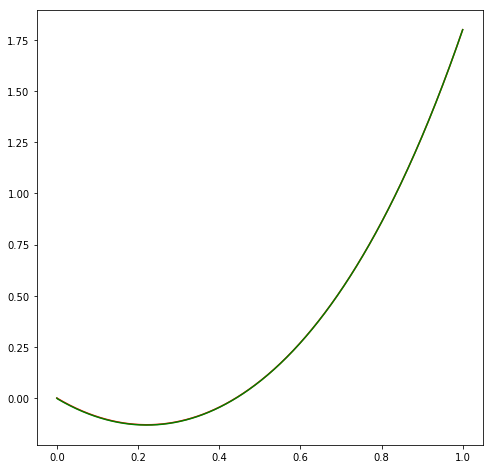

In [4]:
h = accuracy(0.1, 0.001)
A = running(h)
T = np.arange(a, b + h, h)

B = np.zeros(count(h) + 1)
for i in range(count(h) + 1):
    B[i] = u(T[i])

plt.rcParams["figure.figsize"] = (8, 8)
    
plt.plot(T, B, 'r');
plt.plot(T, A, 'g');


In [5]:
max(runge(h))

0.0003066229596952518

In [6]:
h

0.0015625